# Preamble: Load the dataset and examine it.

### Notes: 
* This exam consists of a Regression problem.  
* The target feature is 'cltv'. 
* Random state should be taken as 42 wherever applicable.

# Metadata

1. id-Unique identifier of a customer  
2. gender-Gender of the customer   
3. area-Area of the customer   
4. qualification-Highest Qualification of the customer  
5. income-Income earned in a year (in rupees).   
6. marital_status- 0:Single, 1: Married 
7. vintage-No. of years since the first policy date.  
8. claim_amount-Total Amount Claimed by the customer (in rupees) 
9. num_policies-Total no. of policies issued by the customer 
10. policy-Active policy of the customer 
11. type_of_policy-Type of active policy
12. cltv- Customer life time value. It is the total amount of money a customer is expected to spend with your business, or on your products, during the lifetime of an average business relationship. [TARGET]

### Q1. [marks : 0] Which dataset are you using for this exam?

Options:

A) V1

B) V2

C) V3

D) V4

E) V5

Answer: V1: A, V2:B, V3: C, V4:D, V5:E


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load dataset by yourself from the location of the file
data = pd.read_csv(use appropriate filename)

In [ ]:
data.shape

(6257, 12)

In [ ]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,27529,Male,Urban,High School,42.99,0,0,3849.0,1,A,Platinum,66816
1,27116,Male,Rural,Bachelor,5.33,1,6,3006.0,More than 1,A,Gold,67164
2,6499,Female,Urban,High School,2.26,1,2,NaN,More than 1,A,Platinum,68076
3,61863,Male,Rural,High School,20.29,1,8,2844.0,More than 1,A,Platinum,63276
4,25045,Female,Urban,High School,5.63,0,6,6370.0,More than 1,A,Platinum,245844


## Q.2 [Marks: 2] How many total number of features (excluding target variable) are there in the dataset?

Options

(a) 1000

(b) 11

(c) 12

(d) 10

Answer: V1,V2, V3, V4, V5: Option (b)

In [ ]:
print('No of Columns:',data.shape[1]-1) #-1 is there to exclude target variable

No of Columns: 11


## Q.3 [Marks: 2] What are the unique values of feature `Types of Policy` in the dataset?

A) ['Bronze', 'Gold']

B) ['Gold', 'Silver']

C) ['Platinum', 'Gold', 'Silver', 'Bronze]

D) ['Platinum', 'Gold', 'Silver']

Answer: V1,V2, V3, V4, V5: option D

In [ ]:
data["type_of_policy"].unique() 

array(['Platinum', 'Gold', 'Silver'], dtype=object)

## Q.4 [Marks: 3] Which of the following columns have categorical data?[MSQ]

A) income

B) id

C) area

D) claim_amount

E) qualification

Answer V1,V2,V3, V4, V5 : Option C & E


In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              6257 non-null   int64  
 1   gender          6257 non-null   object 
 2   area            5873 non-null   object 
 3   qualification   6257 non-null   object 
 4   income          5856 non-null   float64
 5   marital_status  6257 non-null   int64  
 6   vintage         6257 non-null   int64  
 7   claim_amount    5897 non-null   float64
 8   num_policies    6257 non-null   object 
 9   policy          5885 non-null   object 
 10  type_of_policy  6257 non-null   object 
 11  cltv            6257 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 586.7+ KB


In [ ]:
numCols = list(data.select_dtypes("number").columns)
catCols = list(data.select_dtypes(exclude = "number").columns)

## Q5.[Marks: 4] Plot the `heatmap` and mark the pair which has the highest positive correlation value. [MCQ]

A) claim_amount & income

B) income & cltv

C) vintage & income.

D) claim_amount & cltv.

Ans: V1, V2,V3,V4,V5 : Option D


<AxesSubplot:>

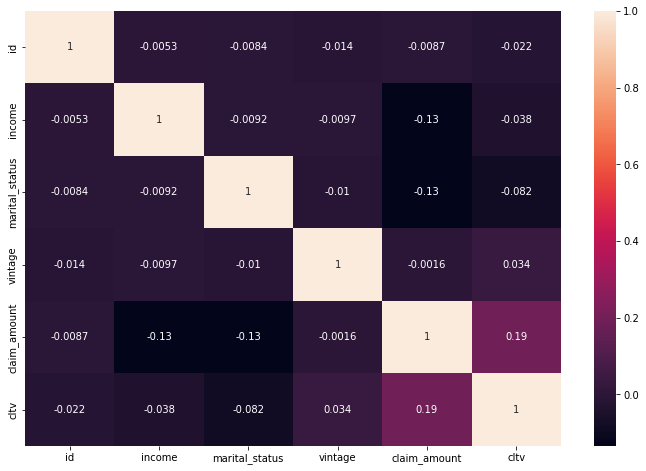

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)  # data.corr() will give a correlation matrix for features containing numerical data

## Q6 [marks: 2] Which of the following features have `missing` values?[MSQ]

Options:

A) gender

B) area 

C) qualification

D) income

E) claim_amount

F) policy


Answer: V1,V2, V3, V4, V5 : option B,D,E,F


In [ ]:
data.isnull().sum() #to check null values

id                  0
gender              0
area              384
qualification       0
income            401
marital_status      0
vintage             0
claim_amount      360
num_policies        0
policy            372
type_of_policy      0
cltv                0
dtype: int64

##Q7 [Marks = 4] Break the dataset into features(`X`) and label (`y`), where the column `cltv` goes to `y` and the rest of the columns go to `X`. Enter the avg value of `cltv` column? [NAT]

Answer:

V1: 97788.08 (Range: 97640 - 97700)

V2: 98616.73 (Range: 98600 - 98650)

V3: 96557.26 (Range: 96530 - 96600)

V4: 98753.60 (Range: 98700 - 98800)

V5: 99423.43 (Range: 99400- 99450)


In [ ]:
X = data.drop(['cltv'], axis= "columns")   # works on pandas dataframe  
y = data['cltv']

# iloc function also work

# X = data.iloc[:,:-1]
# y = data.iloc[:,-1]

X.shape,y.shape

((6257, 11), (6257,))

In [ ]:
np.round(y.mean(),2)

97788.08

# Q8 [Marks : 3] Split the dataset into training and test dataset using `train_test_split` into `70:30` ratio while keeping random_state =42. What is the shape of the training set (X_train) ? [MCQ]

Ans: 

A) (4379, 11)

B) (4392, 13)

C) (4340, 11)

D) (4379, 15)

Ans: A

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape

((4379, 11), (1878, 11))

## Q9 [Mark 2] Drop(remove) `id` column from train and test data because it is not useful in model training. Now how many feature columns are remaining in the training dataset? [NAT]

ANS 

V1,V2,V3,V4,V5 : 10

In [ ]:
X_train.drop(['id'],axis=1,inplace=True)
X_test.drop(['id'],axis=1,inplace=True)


X_train.iloc[:,1:]
X_test.iloc[:,1:]


print(f"columns in dataset : {X_train.shape[1]}")

columns in dataset : 10


# Replace missing values as instructed below in each column of data.

##Q10 [Marks2] Compute and write median of the `income` column of X_train while ignoring the missing values. Replace all NaN values in the income column of X_train and X_test by the median  computed from the X_train (upto two decimal). [NAT]. 

Ans

V1: 7.04

V2: 7.17

V3: 7.05

V4: 7.07

V5: 6.89

In [ ]:
# Using SimpleImputer from sklearn

print("X_train median: ", np.median(X_train['income']))

from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy= 'median')

X_train['income'] = si.fit_transform(X_train[['income']])

X_test['income'] = si.transform(X_test[['income']])


X_train median:  7.04


In [ ]:
# # using fillna() from pandas 

# income_median = X_train['income'].median()
# print(income_median)

# X_train.fillna(value= {"income": income_median},inplace=True)

# X_test.fillna(value= {"income": income_median},inplace=True)

7.04


##Q11 [2 Marks] Which is the most frequent value in the `policy` column of X_train? Replace all NaN value in `policy` column of X_train and X_test by most frequent value in X_train [MCQ]

a) 'A'

b) 'B'

c) 'C'

d) None of the above


Ans:  a) 'A'

In [ ]:
# Using SimpleImputer from sklearn

from scipy import stats

print("X_train most frequent policy: ", stats.mode(X_train['policy'])[0][0])

si = SimpleImputer(missing_values=np.nan, strategy= 'most_frequent')

X_train['policy'] = si.fit_transform(X_train[['policy']])

X_test['policy'] = si.transform(X_test[['policy']])


X_train most frequent policy:  A


In [ ]:
# # using fillna() from pandas

# print(X_train['policy'].value_counts())

# policy_most_freq = X_train['policy'].mode()

# print("Most Frequent policy:",policy_most_freq[0])

# X_train.fillna(value= { "policy": policy_most_freq[0]},inplace=True)

# X_test.fillna(value= { "policy": policy_most_freq[0]},inplace=True)


A    2827
B    1160
C     392
Name: policy, dtype: int64
Most Frequent policy: A


##Q12 [2 Marks] Which is the most frequent value in the `area` column of X_train? Replace all NaN value in `area` column of X_train and X_test by most frequent value from X_train [MCQ]

a) 'Urban'

b) 'Rural'

c) 'Semi-Urban'

d) None of the above


Ans:  a) 'A'

In [ ]:
# Using SimpleImputer from sklearn 

print("X_train most frequent area: ", stats.mode(X_train['area'])[0][0])

si = SimpleImputer(missing_values=np.nan, strategy= 'most_frequent')

X_train['area'] = si.fit_transform(X_train[['area']])  # fit_transform
 
X_test['area'] = si.transform(X_test[['area']])  # transform


X_train most frequent area:  Urban


In [ ]:
# # using fillna() from pandas

# print(X_train['area'].value_counts())

# area_most_freq = X_train['area'].mode()

# print("Most Frequent area: ",area_most_freq[0])

# X_train.fillna(value= { "area": area_most_freq[0]},inplace=True)

# X_test.fillna(value= { "area": area_most_freq[0]},inplace=True)


Urban    2915
Rural    1182
Name: area, dtype: int64
Most Frequent Urban


## Q13[2 Marks] Replace all NaN value in claim_amount column of X_train and X_test by 0 (Zero). After Replacing NAN values from claim_amount column what is the standard deviation of claim_amount column in X_train. (correct upto two decimal places) [NAT]

V1: 3358.66

V2: 3384.55

V3: 3308.99

V4: 3297.89

V5: 3330.75

In [ ]:
# Using Simple Imputer 

si = SimpleImputer(missing_values=np.nan, strategy= 'constant', fill_value= 0)
X_train['claim_amount'] = si.fit_transform(X_train[['claim_amount']])
X_test['claim_amount'] = si.transform(X_test[['claim_amount']])

np.round(X_train['claim_amount'].std(),2)

3358.66

In [ ]:
# # using fillna() from pandas

# X_train.fillna(value= {"claim_amount": 0},inplace=True)

# X_test.fillna(value= {"claim_amount": 0},inplace=True)

# np.round(X_train['claim_amount'].std(),2)

3358.66

In [ ]:
X_train.isnull().sum()

gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

In [ ]:
X_test.isnull().sum()

gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

#Q14 [Marks: 4] Apply `MinMaxScaler` on `income` column of X_train. Compute and write median of `income` column? (correct Upto 2 decimal)[NAT]

V1: 0.07

V2: 0.07

V3: 0.07

V4: 0.07

V5: 0.07

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms_income = mms.fit_transform(X_train[['income']])

mms_income[:,0].shape

np.round(np.median(mms_income[:,0]),2)

0.07

# Apply preprocessing on features of X_train and X_test dataset.

## For Categorical Features 

* Apply OneHotEncoding from `sklearn` library on all categorical features(object columns). Do Encoding in the order of following list

* ['gender', 'area','qualification','marital_status', 'num_policies', 'policy', 'type_of_policy']

Lets call the transformed caterical feature matrix $X_1$

## For Numerical Features 

apply MinMaxScaler and transform the dataset. Do scaling in the order of following list

Numerical Features =  [ 'income', 'vintage', 'claim_amount' ]


Lets call the transformed numerical feature matrix $X_2$

### concatenate(One Hot Encoded Features, Scaled Numerical Features)

After combining transformed categorical feature($X_1$) matrix and transformed numerical feature matrix ($X_2$) (side by side in that order), the output will be $X=[X_1 X_2]$

## Hints
* Apply ColumnTransformer to encode categorical columns scaling on numerical columns with required preprocessor

* Another way is to separately encode all categorical columns and scale numerical columns and do concatenate (`hstack`) both. keep categorical columns in front of numerical while concatenating. 


The transformed (as desribed by above steps) X_train and X_test, should be considered as X_train and X_test henceforth.




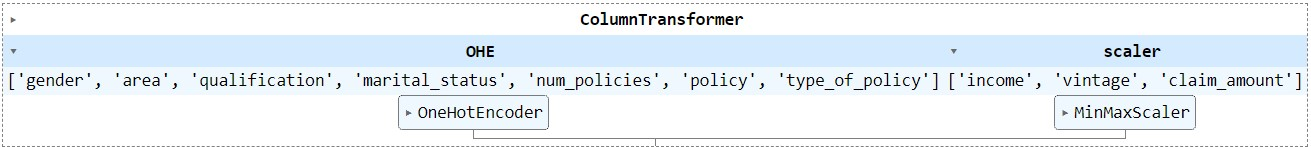

## Q15 [Marks:10] How many features you will get after preprocessing? [MCQ]


[Options]

A) 13

B) 20

C) 25

D) 01 

Ans : B) 20

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import  ColumnTransformer
from sklearn import set_config
set_config(display='diagram')

In [ ]:
transformer = [
    ("OHE",OneHotEncoder(),['gender', 'area','qualification','marital_status', 'num_policies', 'policy', 'type_of_policy']),
    ('scaler', MinMaxScaler(), ['income','vintage','claim_amount'])
]

ct = ColumnTransformer(transformer)

ct

ColumnTransformer(transformers=[('OHE', OneHotEncoder(),
                                 ['gender', 'area', 'qualification',
                                  'marital_status', 'num_policies', 'policy',
                                  'type_of_policy']),
                                ('scaler', MinMaxScaler(),
                                 ['income', 'vintage', 'claim_amount'])])

In [ ]:
pro_X_train = ct.fit_transform(X_train)
pro_X_test = ct.transform(X_test)

pro_X_train.shape,pro_X_test.shape

((4379, 20), (1878, 20))

# Solution 2

In [ ]:
# X_train
# Categorical Features

ohe = OneHotEncoder()
X_train_category = X_train[['gender', 'area','qualification','marital_status', 'num_policies', 'policy', 'type_of_policy']]

X1 = ohe.fit_transform(X_train_category).toarray()

mms = MinMaxScaler()
X2 = mms.fit_transform(X_train[['income','vintage','claim_amount']])


pro_X_train = np.hstack((X1, X2))
pro_X_train.shape

(4379, 20)

In [ ]:
# X_test

# Categorical Features

X_test_category = X_test[['gender', 'area','qualification','marital_status', 'num_policies', 'policy', 'type_of_policy']]
X_test_numerical = X_test[['income','vintage','claim_amount']]

X1_test = ohe.transform(X_test_category).toarray()

#Numerical Features

X2_test = mms.transform(X_test_numerical)

pro_X_test = np.hstack((X1_test, X2_test))

pro_X_test.shape

(1878, 20)

In [ ]:
pro_X_train.shape, pro_X_test.shape 

((4379, 20), (1878, 20))

## Q16 [Marks 5 ] Apply `SequentialFeatureSelector` transformer with direction= 'forward' with `LinearRegression()` estimator and select 5 features by fitting to the X_train and y_train. 

* Use cv = KFold(n_splits=5,random_state=42,shuffle=True) in SequentialFeatureSelector.

## Which of the following options represents the correct integer index of the selected features list?


A) [ 6  9 12 13 19]

B) [ 3  6  9 13 19]

C) [ 8  9 12 14 19]

D) [ 1  2  9 13 19]

E) [ 3  7 10 13 19]



V1 : A) 

V2 : B)

V3 : C) 

V4 : D) 

V5 : E)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
kf = KFold(n_splits=5,random_state=42,shuffle=True)

from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(lr, n_features_to_select=5,cv=kf,direction='forward')
sfs.fit_transform(pro_X_train, y_train)
print(sfs.get_support(indices=True))

[ 3  7 10 13 19]


## Q17 [Marks: 3] Apply `LinearRegression` on the trainig set(`X_train` and `y_train`). What is the `R2 score` on the test set(`X_test` and `y_test`). ( Upto 4 digits after decimal points) [NAT]

ANS: 

V1: 0.1432 (Range: 0.1410 - 0.1450)

V2: 0.1459 (Range: 0.1450 - 0.1480) 

V3: 0.1387 (Range: 0.1360 - 0.1420)

V4: 0.1438 (Range: 0.1410 - 0.1470)

V5: 0.1479 (Range: 0.1450 - 0.1520)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(pro_X_train,y_train)

LinearRegression()

In [ ]:
np.round(lr.score(pro_X_test,y_test),4)

0.1479

## Q18 [Marks: 6]Using the `LinearRegression` model, compute the `cross-validation scores` for `5 splits` on training data (X_train and y_train) using `cross_val_score`.Enter the maximum value of `𝑅2 score` ( Upto 4 digits after decimal points) obtained.[NAT]

* Use cv = KFold(n_splits=5,random_state=42,shuffle=True) in SequentialFeatureSelector.

(Hint: By default cross_val_score uses LinearRegression's scoring metric, which is  𝑅2 score.)

Ans:

V1: 0.1815 (Range: 0.1790-0.1845) 

V2: 0.1559 (Range: 0.1530 -0.1590) 

V3: 0.1610 (Range: 0.1580-0.1640)

v4: 0.1574 (Range: 0.1530-0.1600)

V5: 0.1605 (Range: 0.1570-0.1630)



In [ ]:
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5,random_state=42,shuffle=True)
score = cross_val_score(lr, pro_X_train, y_train, cv=kf) #Which cv value should we give?
np.round(np.max(score),4)

0.1605

## Q19 [Marks :5]Apply Ridge regression with random_state=42 with default penalty value on training set(X_train and y_train) and calculate the 𝑅2 score on test_set (X_test and y_test). What is the correct score ( Upto 4 digits after decimal points)? [NAT]


V1: 0.1445 (Range: 0.1410 - 0.1470) 

V2: 0.1460 (Range: 0.1430 - 0.1490)

V3: 0.1398 (Range: 0.1370 - 0.1430)

V4: 0.1442 (Range: 0.1410 - 0.1470)

V5: 0.1473 (Range: 0.1430 - 0.1600)

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(random_state=42)
clf.fit(pro_X_train, y_train)
np.round(clf.score(pro_X_test,y_test),4)

0.1473

## Q20: [Marks 6] Apply `Lasso regression` with random_state=42 and regularization rate=0.1 on the training data(X_train & y_train). Enter the value of the `intercept` you got correctly upto 2 digits after decimal points . [NAT]

V1: 103168.82 (Range: 103130 - 103195) 

V2: 112942.96 (Range: 112900 - 112980)

V3: 103279.20 (Range: 103230 - 103320)

V4: 108057.90 (Range: 108000 - 108100)

V5: 107300.60 (Range: 107250 - 107350)


In [ ]:
from sklearn.linear_model import Lasso
clf2 = Lasso(alpha=0.1,random_state=42)
clf2.fit(pro_X_train, y_train)
print(np.round(clf2.intercept_,2))

107300.6


## Q21 [Marks 5]  Fit `SGDRegressor(random_state=42)` estimator on the training data(X_train & y_train) and predict labels for test_data(X_test), lets call it as `y_test_predict`. The parameters are initialized with default values. Calculate and mark the correct `mean_absolute_error` value between `y_test` and `y_test_predict` from the given options. (Correct upto two decimals) [NAT] 

Mean Absolute Error

V1: 52840.14 (Range: 52800 - 52880)

V2: 52662.70 (Range: 52630 - 52690)

V3: 50541.40 (Range: 50510 - 50570) 

V4: 55884.28 (Range: 55840 - 55920)

V5: 55261.57 (Range: 55230 - 55290)


In [ ]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(random_state=42)
reg.fit(pro_X_train, y_train)
y_pred_Test = reg.predict(pro_X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_Test)
np.round(mae,2)

55261.57

##Q22: [Marks 6] Using `SGDRegressor(random_state=42)` as an estimator for exactly 10 iterations. 

Write the correct R2 score on test data  [NAT] (correct Upto 4 digits)

Ans:

V1: 0.1421 (Range: 0.1390 - 0.1450)

V2: 0.1403 (Range: 0.1380 - 0.1440)

V3: 0.1367 (Range: 0.1335 - 0.1400)

V4: 0.1421 (Range: 0.1390 - 0.1450)

V5: 0.1475 (Range: 0.1430 - 0.1510)


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=42,max_iter=10)

sgd.fit(pro_X_train, y_train)

np.round(sgd.score(pro_X_test,y_test),4)

0.1475

# (Common Instructions for Question 23 and 24)

##Create a pipeline Using PolynomialFeatures as transformer and Lasso as estimator. Use GridSearchCV with this created pipeline and following hyperparameter values on training data(X_train, y_train) to fit the model .

1. Keep polynomial degree as : [1, 2]
2. alpha value to be taken as : np.logspace(-3, 0, num=5)
3. scoring : neg_mean_absolute_error .

(Note: Kindly ignore the warning.)

## Q23 [6 Marks] Mark the best `alpha` value you got using above instructions.[MCQ]

A) 0.001

B) 0.00562341

C) 0.03162278

D) 0.17782794

E) 1.00

Ans: E) 1.00

## Q24 [5 Marks] Enter the best polynomial degree value you got using above instructions.[NAT]

Ans:

V1: 1

V2: 2

V3: 1

V4: 1

V5: 1


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

In [ ]:
np.logspace(-3, 0, num=5)

array([0.001     , 0.00562341, 0.03162278, 0.17782794, 1.        ])

In [ ]:
grid_pipeline = Pipeline([
    ("poly", PolynomialFeatures()),
    ("Lasso", Lasso())   
    ])
param_grid = {'poly__degree': (1, 2),
              'Lasso__alpha': np.logspace(-3, 0, num=5)} 

Lasso_grid_search = GridSearchCV(grid_pipeline,
                                 param_grid=param_grid,
                                 scoring="neg_mean_absolute_error",
                                 return_train_score=False)
Lasso_grid_search

GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('Lasso', Lasso())]),
             param_grid={'Lasso__alpha': array([0.001     , 0.00562341, 0.03162278, 0.17782794, 1.        ]),
                         'poly__degree': (1, 2)},
             scoring='neg_mean_absolute_error')

In [ ]:
Lasso_grid_search.fit(pro_X_train,y_train)
Lasso_grid_search.best_params_

{'Lasso__alpha': 1.0, 'poly__degree': 1}

# (Common Instructions for Question 25 and 26)
## To Reduce number of dimensions of training data with PCA. Fit the PCA model using following parameter values on training data.

* n_components=5
* svd_solver='full'
* whiten=True
* random_state=42


## Q25: [Marks 5] What is the sum of `explained_variance_ratio_` ? [NAT

Ans: 0.66 (Range: 0.62 - 0.70)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5,whiten=True,svd_solver='full', random_state=42)
X_train_PCA = pca.fit_transform(pro_X_train)

In [ ]:
# Create a new dataset from principal components 
pca_data = pd.DataFrame(X_train_PCA, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5' ]) # 
pca_data['target'] = y_train
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,target
0,0.093732,1.662843,-1.450814,0.835822,1.187168,175140.0
1,-0.732479,-1.209241,-0.709407,0.974817,-0.032890,154452.0
2,0.962206,-0.275504,-1.105984,-1.166332,-0.320842,102588.0
3,-1.316264,1.328575,0.836044,0.726487,2.110081,62532.0
4,1.178487,-1.244181,0.754414,0.748306,-0.905700,59940.0


In [ ]:
pca.explained_variance_ratio_

array([0.15347205, 0.14194554, 0.13307863, 0.12267488, 0.109111  ])

In [ ]:
np.round(sum(pca.explained_variance_ratio_),2)

0.66

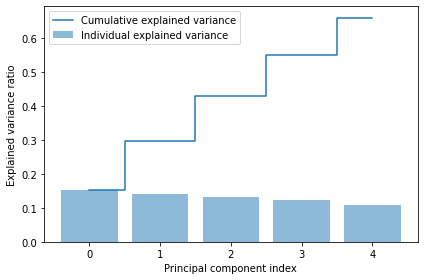

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Q26: [Marks 6] Use PCA transformed training data from earlier question and y_train to fit the `RidgeCV` estimator model having alpha value as [0.001,0.01,0.1,1]. Calculate the R2 score you got from the model for transformed test data(PCA transformed X_test). [NAT] (upto 4 decimal) 

V1: 0.1299 (Range: 0.1270 - 0.1320) 

V2: 0.1298 (Range: 0.1070 - 0.1200)

V3: 0.1284 (Range: 0.1250 - 0.1310)

V4: 0.1238 (Range: 0.1200 - 0.1280)

V5: 0.1383 (Range: 0.1350 - 0.1410)


In [ ]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[0.001,0.01,0.1,1])
clf.fit(X_train_PCA, y_train)

RidgeCV(alphas=[0.001, 0.01, 0.1, 1])

In [ ]:
X_test_pca =  pca.transform(pro_X_test)
np.round(clf.score(X_test_pca,y_test),4)

0.1383